In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

## <b> Load Datasets </b>

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['customer_churn.csv']))
df.head()

Saving customer_churn.csv to customer_churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## <b> Preprocessing </b>

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
# invalid data exist. need to be fix
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [ ]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

## **Data Visualization**

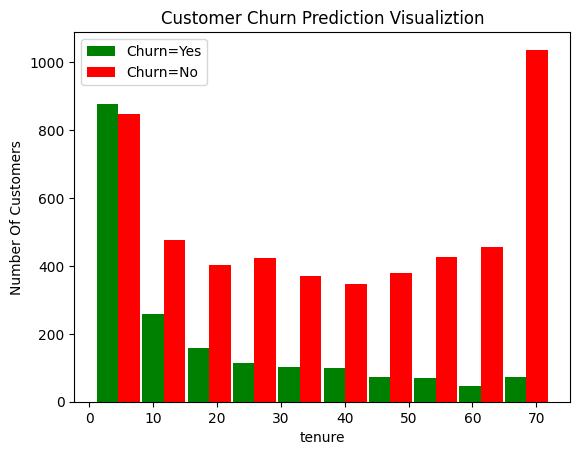

In [ ]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()



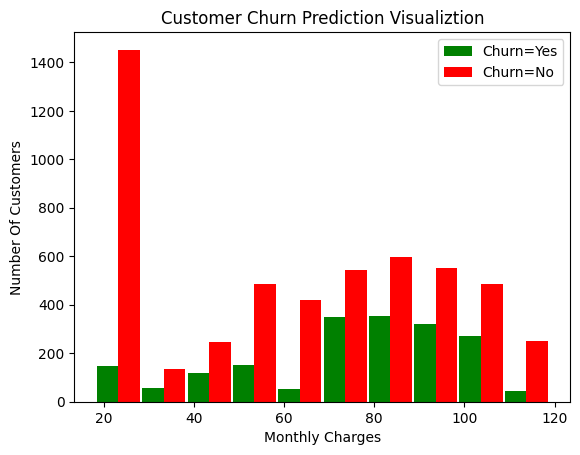

In [ ]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

## <b> Preprocessing Datasets</b>

In [ ]:
## see the unique values
def print_unique_col_values(df, flag):
  if flag==0:
    for column in df:
      if df[column].dtypes=='object':
        print(f'{column}: {df[column].unique()}') 
  else:
    for column in df:
      print(f'{column}: {df[column].unique()}')
print_unique_col_values(df, 0)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [ ]:
# fix yes-no and convert it to 1 or 0
def convert_to_bool(df, columns):
  df1 = df.copy()
  # fix similar of yes-no
  df1.replace('No internet service','No', inplace=True)
  df1.replace('No phone service','No', inplace=True)

  # convert yes-no to 1-0
  for col in columns:
    df1[col].replace({'Yes': 1,'No': 0}, inplace=True)

  # fix gender 
  df1['gender'].replace({"Female":1, "Male":0}, inplace=True)
  
  # fix total-chargse
  df1['TotalCharges'] = pd.to_numeric(df1["TotalCharges"],  errors='coerce')
  # fix others
  df1 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
  return df1

In [ ]:
columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
df1 = convert_to_bool(df, columns)
print(print_unique_col_values(df1, 1))
print(df1.dtypes)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]
None
gender                             

<b> Scalling </b>

In [ ]:
# scalling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])
print_unique_col_values(df1, 1)

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

<b> train-test splitting </b>

In [ ]:
x = df1.drop('Churn', axis='columns')
y = df1['Churn'].copy()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train)

(5625, 26)
(1407, 26)
5664    1
101     0
2621    0
392     0
1327    1
       ..
3051    0
1730    1
4086    0
2259    0
2920    0
Name: Churn, Length: 5625, dtype: int64


## <b> Build Models </b>

In [ ]:
def get_model():
  model = keras.Sequential([
  keras.layers.Dense(26, input_shape=(26,), activation='relu'),
  keras.layers.Dense(15, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
  ])

  # opt = keras.optimizers.Adam(learning_rate=0.01)

  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=100)
  return model

In [ ]:
model = get_model()
predict = model.predict(x_test)
model.evaluate(x_test, y_test)

Epoch 1/100
176/176 [==============================] - 6s 3ms/step - loss: 0.4721 - accuracy: 0.7664
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4236 - accuracy: 0.7988
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8027
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4127 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8084
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4063 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4003 - accura

[0.48861297965049744, 0.764747679233551]

In [ ]:
type(predict)

numpy.ndarray

In [ ]:
def convert_to_1_or_0(arr):
  res=[]
  for i in arr:
    if i < .5:
      res.append(0)
    else:
      res.append(1) 
    
  return np.array(res, dtype=int)

In [ ]:
predict = convert_to_1_or_0(predict)
predict


array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       999
           1       0.62      0.50      0.55       408

    accuracy                           0.76      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.75      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

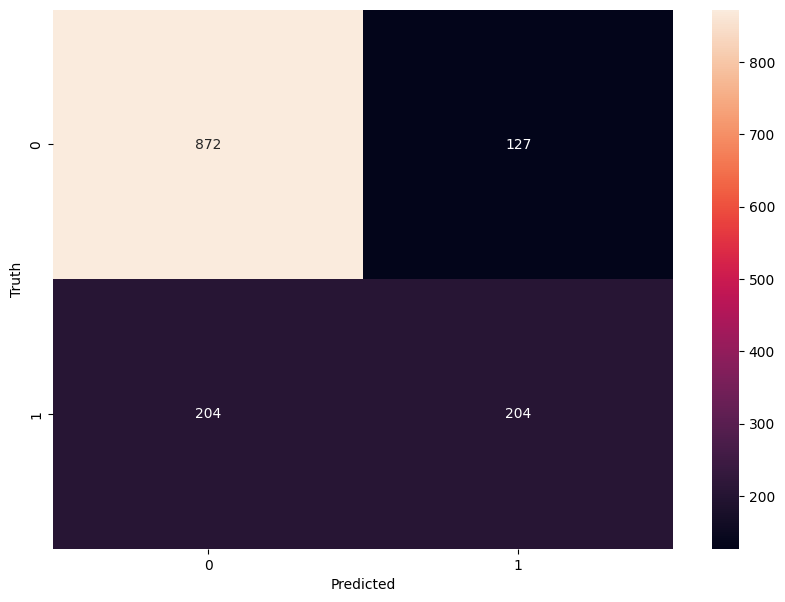

In [ ]:
# visualize classification confusion matrix
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=predict)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## <b> Skewness of Data </b>



Method 1: Under-sampling

In [ ]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

(5163, 27)
(1869, 27)


In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())
print(df_test_under)

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64
      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1608       0              0        0           0  0.225352             1   
3068       0              0        1           0  0.704225             1   
4007       0              0        1           0  0.760563             1   
4445       1              0        0           0  0.873239             1   
4787       1              0        1           0  0.042254             1   
...      ...            ...      ...         ...       ...           ...   
7021       0              0        0           0  0.154930             1   
7026       1              0        0           0  0.112676             1   
7032       0              1        0           0  0.000000             1   
7034       1              0        0           0  0.929577             1   
7041       0              1        1           0  0.042254             1   

      MultipleLine

In [ ]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 3s 3ms/step - loss: 0.6601 - accuracy: 0.6080
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.7468
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4951 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7686
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7686
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7662
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7749
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.7729
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.7769
Epoch 11/

Method2: Over-sampling

In [ ]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 3ms/step - loss: 0.5440 - accuracy: 0.7318
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4917 - accuracy: 0.7655
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4831 - accuracy: 0.7665
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4769 - accuracy: 0.7666
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4744 - accuracy: 0.7697
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4712 - accuracy: 0.7738
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4685 - accuracy: 0.7748
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4660 - accuracy: 0.7792
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4636 - accuracy: 0.7800
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4629 - accura

Method3: SMOTE </br>
To install imbalanced-learn library use <b>pip install imbalanced-learn</b> command

In [ ]:
# pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X = df1.drop('Churn', axis='columns')
y = df1['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 3ms/step - loss: 0.5443 - accuracy: 0.7215
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4745 - accuracy: 0.7713
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.7778
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.7809
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.7833
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4480 - accuracy: 0.7896
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4441 - accuracy: 0.7918
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4395 - accuracy: 0.7921
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4359 - accuracy: 0.7950
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4333 - accura

Method4: Use of Ensemble with undersampling

In [ ]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
# Regain Original features and labels
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
df2 = X_train.copy()
df2['Churn'] = y_train
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df2_class0 = df2[df2.Churn==0]
df2_class1 = df2[df2.Churn==1]
print(df2_class0.head())
print(df2_class1.head())

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
684        1              0        0           0  0.000000             1   
1680       0              0        1           1  0.774648             1   
2220       0              0        1           0  1.000000             1   
2842       1              0        0           0  0.042254             0   
4372       0              0        1           1  0.000000             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
684               0               0             0                 0  ...   
1680              1               0             0                 0  ...   
2220              0               1             1                 0  ...   
2842              0               1             0                 1  ...   
4372              0               0             0                 0  ...   

      InternetService_Fiber optic  InternetService_No  \
684                          

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 

In [ ]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 3s 3ms/step - loss: 0.6564 - accuracy: 0.6472
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7528
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4984 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7702
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7682
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4842 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7746
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7749
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4746 - accuracy: 0.7739
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6117 - accuracy: 0.6579
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.7485
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4958 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4882 - accuracy: 0.7622
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4848 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4785 - accuracy: 0.7639
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4779 - accuracy: 0.7686
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4732 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.7712
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.7689
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df2_class0, df2_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 3s 3ms/step - loss: 0.5953 - accuracy: 0.7249
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.7670
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7620
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4824 - accuracy: 0.7681
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.7696
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7746
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7719
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.7784
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.7746
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7806
Epoch 11/

In [ ]:
len(y_pred1)

1407

In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [ ]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1033
           1       0.47      0.81      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407

